In [4]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv("/home/lemina/Downloads/tree_addhealth.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management

data_clean = data.dropna()

In [6]:
cluster=data_clean[['ALCEVR1','MAREVER1','ALCPROBS1','VIOL1',
'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT','GPA1']]
cluster.describe()

,ALCEVR1,MAREVER1,ALCPROBS1,VIOL1,DEP1,ESTEEM1,SCHCONN1,PARACTV,PARPRES,FAMCONCT,GPA1
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,0.527432,0.241967,0.369180,1.618579,8.537049,40.952131,28.360656,6.290710,13.398033,22.570557,2.815647
std,0.499302,0.428321,0.894947,2.593230,6.571052,5.381439,5.156385,3.360219,2.085837,2.614754,0.770167
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,6.000000,0.000000,3.000000,6.300000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,38.000000,25.000000,4.000000,12.000000,21.700000,2.250000
50%,1.000000,0.000000,0.000000,0.000000,7.000000,40.000000,29.000000,6.000000,14.000000,23.700000,2.750000
75%,1.000000,0.000000,0.000000,2.000000,12.000000,45.000000,32.000000,9.000000,15.000000,24.300000,3.500000
max,1.000000,1.000000,6.000000,19.000000,48.000000,50.000000,38.000000,18.000000,15.000000,25.000000,4.000000


In [7]:
# standardize clustering variables to have mean=0 and sd=1
clustervar=cluster.copy()
clustervar['ALCEVR1']=preprocessing.scale(clustervar['ALCEVR1'].astype('float64'))
clustervar['ALCPROBS1']=preprocessing.scale(clustervar['ALCPROBS1'].astype('float64'))
clustervar['MAREVER1']=preprocessing.scale(clustervar['MAREVER1'].astype('float64'))
clustervar['DEP1']=preprocessing.scale(clustervar['DEP1'].astype('float64'))
clustervar['ESTEEM1']=preprocessing.scale(clustervar['ESTEEM1'].astype('float64'))
clustervar['VIOL1']=preprocessing.scale(clustervar['VIOL1'].astype('float64'))
clustervar['GPA1']=preprocessing.scale(clustervar['GPA1'].astype('float64'))
clustervar['FAMCONCT']=preprocessing.scale(clustervar['FAMCONCT'].astype('float64'))
clustervar['SCHCONN1']=preprocessing.scale(clustervar['SCHCONN1'].astype('float64'))
clustervar['PARACTV']=preprocessing.scale(clustervar['PARACTV'].astype('float64'))
clustervar['PARPRES']=preprocessing.scale(clustervar['PARPRES'].astype('float64'))

In [8]:
# split data into train and test sets
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

In [9]:
# k-means cluster analysis for 1-7 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,8)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])


Text(0.5,1,u'Selecting k with the Elbow Method')

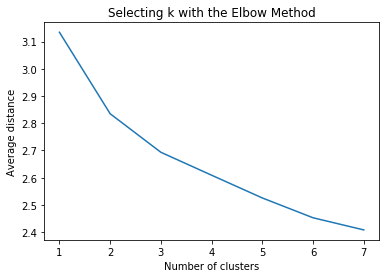

In [10]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

In [11]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

In [ ]:
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()


In [47]:
clus_train.reset_index(level=0, inplace=True)
cluslist=list(clus_train['index'])
labels=list(model3.labels_)
newlist=dict(zip(cluslist, labels))
newlist
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
newclus.columns = ['cluster']

In [48]:
newclus.reset_index(level=0, inplace=True)
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
merged_train.cluster.value_counts()

0    1394
1    1135
2     673
Name: cluster, dtype: int64

In [49]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)


Clustering variable means by cluster
             level_0        index   ALCEVR1  MAREVER1  ALCPROBS1     VIOL1  \
cluster                                                                      
0        1578.804878  3261.581779 -1.056455 -0.471182  -0.412562 -0.256268   
1        1629.444053  3329.983260  0.946562  0.013099   0.009827 -0.113520   
2        1596.624071  3261.956909  0.583460  0.958114   0.773025  0.681181   

             DEP1   ESTEEM1  SCHCONN1   PARACTV   PARPRES  FAMCONCT      GPA1  
cluster                                                                        
0       -0.319318  0.235002  0.359005  0.110758  0.175811  0.332808  0.257947  
1       -0.191027  0.230108  0.159890  0.187507  0.126410  0.245775  0.069399  
2        0.897267 -0.784186 -1.005145 -0.514178 -0.557757 -1.057826 -0.637247  


In [50]:
deviant_data=data_clean['DEVIANT1']

In [51]:
deviant_train, deviant_test = train_test_split(deviant_data, test_size=.3, random_state=123)
deviant_train1=pd.DataFrame(deviant_train)
deviant_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(deviant_train1, merged_train, on='index')
sub1 = merged_train_all[['DEVIANT1', 'cluster']].dropna()

In [55]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

In [56]:
deviantmod = smf.ols(formula='DEVIANT1 ~ C(cluster)', data=sub1).fit()
print (deviantmod.summary())

print ('means for DEVIANT1 by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for DEVIANT1 by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['DEVIANT1'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:               DEVIANT1   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     518.6
Date:                Tue, 16 Jan 2018   Prob (F-statistic):          8.29e-196
Time:                        14:53:28   Log-Likelihood:                -8072.1
No. Observations:                3202   AIC:                         1.615e+04
Df Residuals:                    3199   BIC:                         1.617e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1399      0.081     